In [39]:
import numpy as np

L = 10.0
N = 1024

x = np.linspace(-L, L, N, endpoint=False)
dx = x[1] - x[0]

k = (2 * np.pi / (2*L)) * np.fft.fftfreq(N, d=dx)

In [40]:
x0 = -5
sig = 0.1
k0 = 5.0


psi0 = np.exp(-(x - x0)**2 / (2 * sig**2)) * np.exp(1j * k0 * x)

# For V as a square barrier 
    -The particle is free outside, V = 0
    -Inside constant, positive V that is not 0 and not infinite
        -This allows the particle to reclect off the barrier or trasnmit


In [45]:
V = np.zeros_like(x) #Set potential equal to 0 everywhere(array)
V[(x > -1) & (x < 1)] = 2.5 #Set potential to equal 10 from -1 to 1



In [46]:
hbar = 1.0
m = 1.0
#I have these set to 1 for now to simplify the code.  Real values can be added later if necesary

T = (hbar**2 * k**2) / (2 * m)
#Kinetic energy, Fourier Space

expT = np.exp(-1j * T * (dx/2) / hbar)   # half step
expV = lambda dt: np.exp(-1j * V * dt / hbar)  # potential step

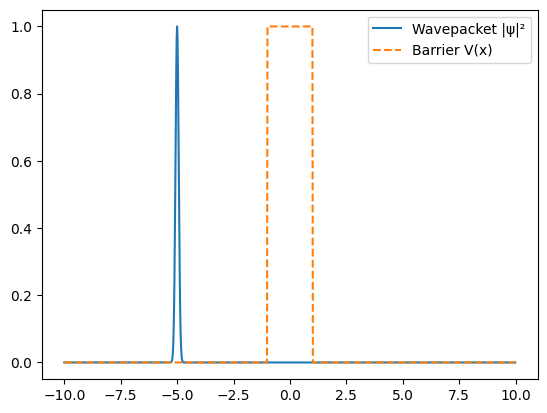

In [48]:
plt.plot(x, np.abs(psi)**2, label="Wavepacket |ψ|²")
plt.plot(x, V / np.max(V) * np.max(np.abs(psi)**2), label="Barrier V(x)", linestyle="--")  # scaled barrier for visibility
plt.legend()
plt.show()

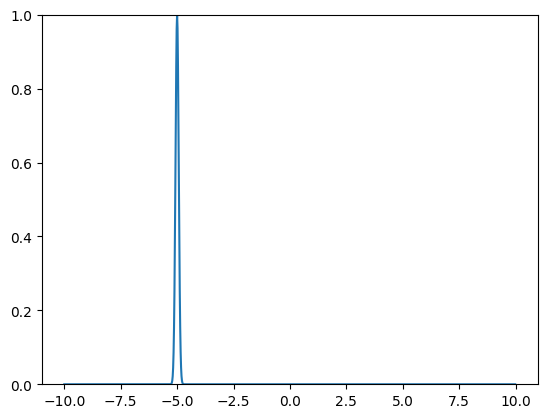

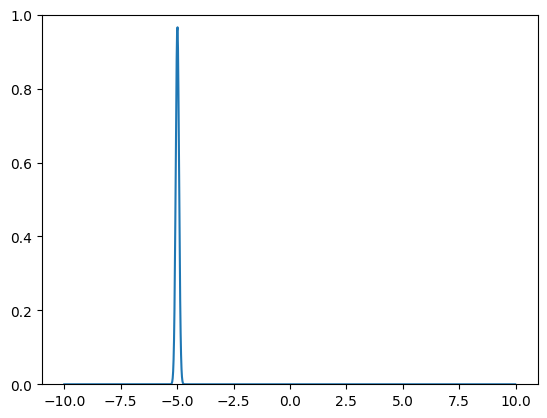

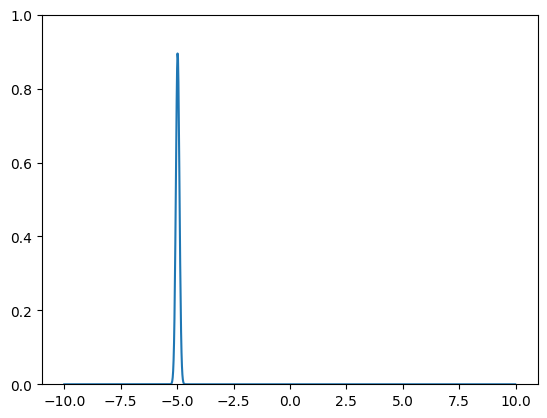

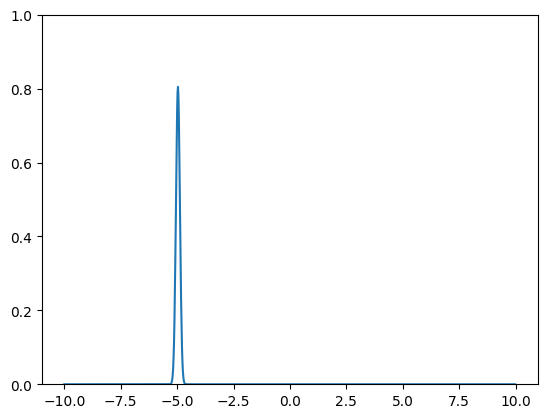

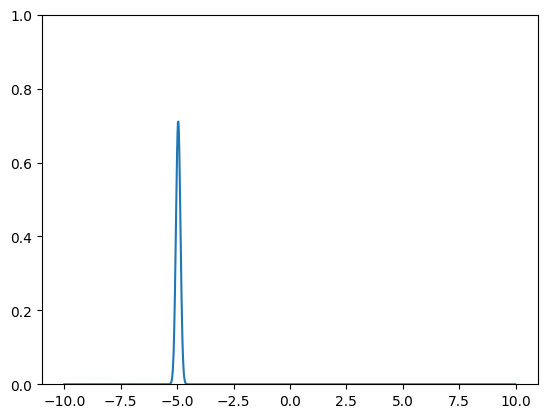

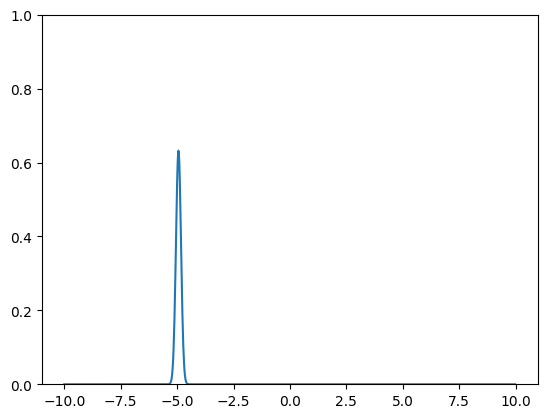

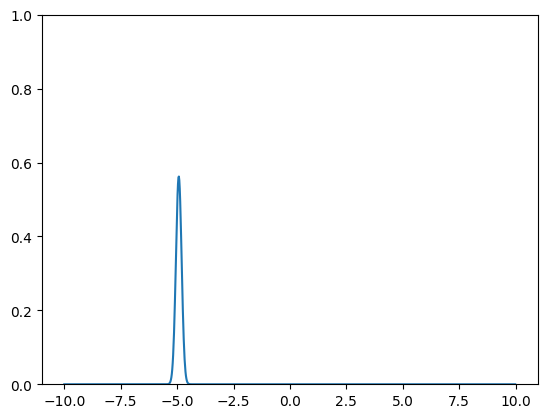

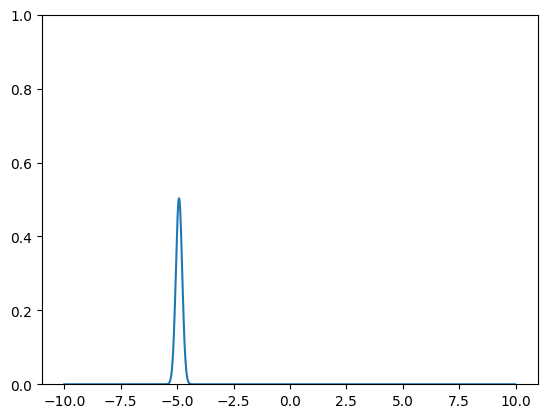

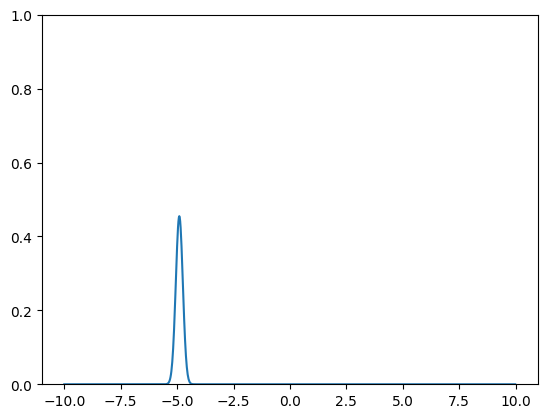

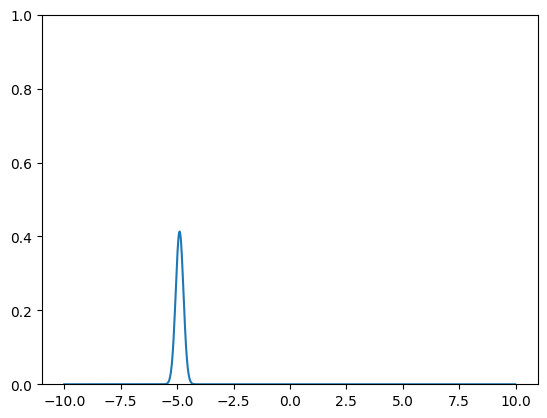

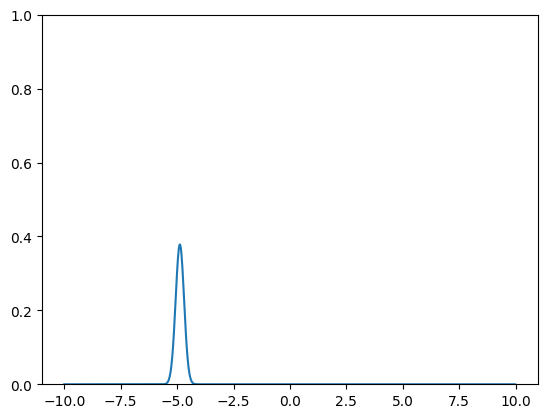

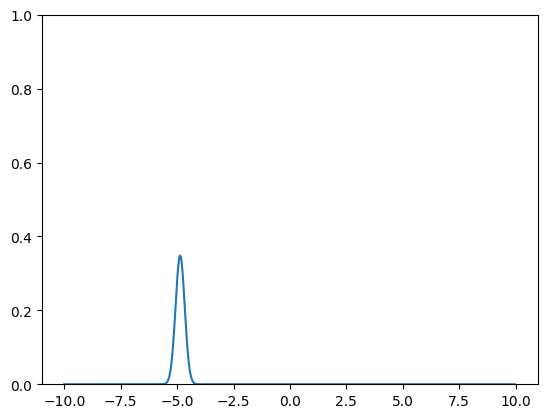

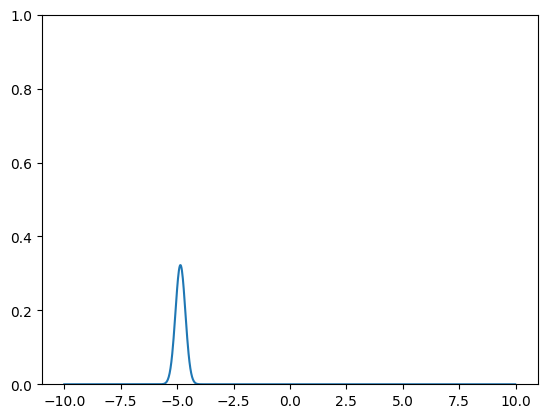

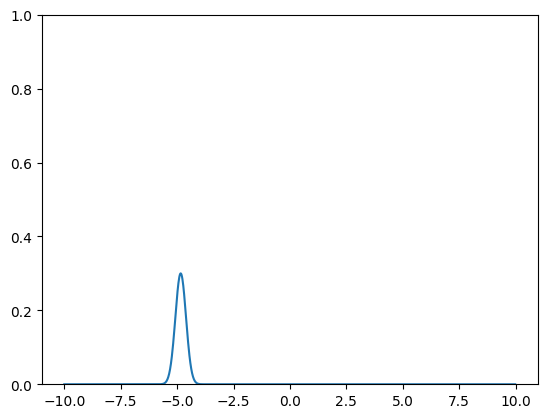

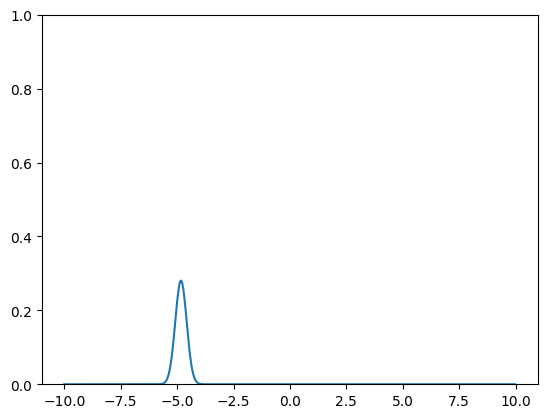

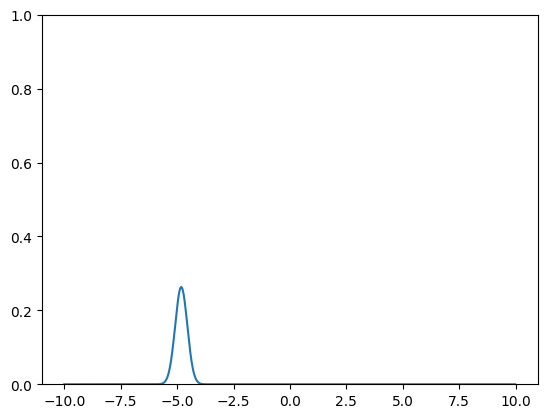

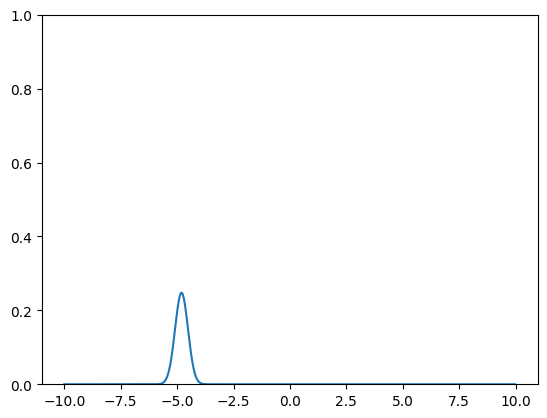

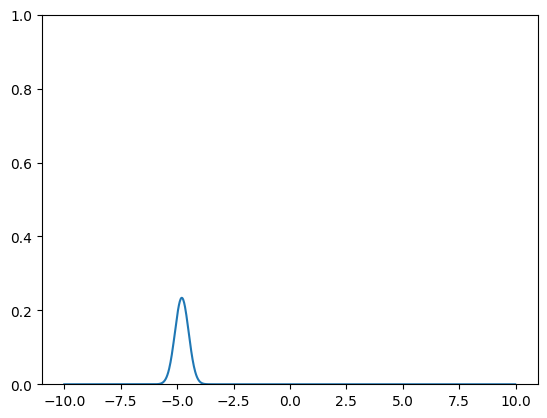

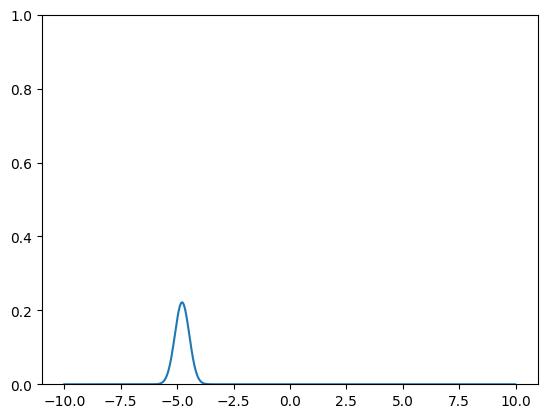

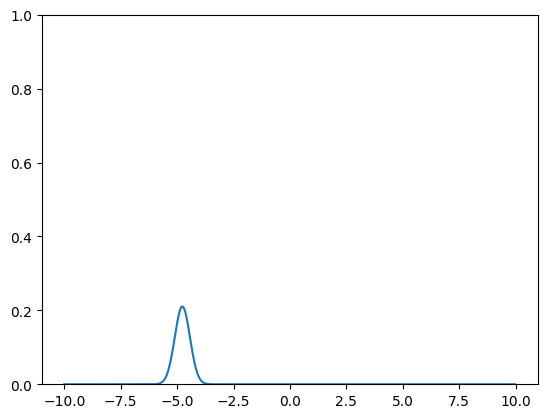

In [49]:
from matplotlib import pyplot as plt

dt = 0.1
steps = 1000

psi = psi0.copy()

for i in range(steps):
    psi_hat = np.fft.fft(psi)
    psi_hat = expT * psi_hat
    psi = np.fft.ifft(psi_hat)

    psi = expV(dt) * psi

    psi_hat = np.fft.fft(psi)
    psi_hat = expT * psi_hat
    psi = np.fft.ifft(psi_hat)

    if i % 50 == 0:
        plt.clf()
        plt.plot(x, np.abs(psi)**2)
        plt.ylim(0, 1)
        plt.pause(0.01)